# Итоговая работа по курсу «Python и математика для анализа данных»

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Список-задач" data-toc-modified-id="Список-задач-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Список задач</a></span></li><li><span><a href="#Загрузить-файл-hr.csv" data-toc-modified-id="Загрузить-файл-hr.csv-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузить файл hr.csv</a></span></li><li><span><a href="#Рассчитать-основные-статистики-для-переменных-(среднее,медиана,мода,мин/макс,сред.отклонение)" data-toc-modified-id="Рассчитать-основные-статистики-для-переменных-(среднее,медиана,мода,мин/макс,сред.отклонение)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)</a></span></li><li><span><a href="#Рассчитать-и-визуализировать-корреляционную-матрицу-для-переменных" data-toc-modified-id="Рассчитать-и-визуализировать-корреляционную-матрицу-для-переменных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Рассчитать и визуализировать корреляционную матрицу для переменных</a></span></li><li><span><a href="#Визуализировать-несколько-взаимосвязей-между-переменными" data-toc-modified-id="Визуализировать-несколько-взаимосвязей-между-переменными-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Визуализировать несколько взаимосвязей между переменными</a></span></li><li><span><a href="#С-использованием-t-test-статистики-проверить-взаимосвязи-между-несколькими-переменными" data-toc-modified-id="С-использованием-t-test-статистики-проверить-взаимосвязи-между-несколькими-переменными-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>С использованием t-test статистики проверить взаимосвязи между несколькими переменными</a></span><ul class="toc-item"><li><span><a href="#Сотрудники-IT-так-же-удовлетворены-работой-в-компании-как-и-сотрудники-HR-отдела" data-toc-modified-id="Сотрудники-IT-так-же-удовлетворены-работой-в-компании-как-и-сотрудники-HR-отдела-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Сотрудники IT так же удовлетворены работой в компании как и сотрудники HR отдела</a></span></li><li><span><a href="#Руководители-столько-же-часов-сколько-и-подчиненные." data-toc-modified-id="Руководители-столько-же-часов-сколько-и-подчиненные.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Руководители столько же часов сколько и подчиненные.</a></span></li><li><span><a href="#У-сотрудников-получавших-повышение-оценка-такая-же-как-у-не-получавших." data-toc-modified-id="У-сотрудников-получавших-повышение-оценка-такая-же-как-у-не-получавших.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>У сотрудников получавших повышение оценка такая же как у не получавших.</a></span></li></ul></li><li><span><a href="#Рассчитать-сколько-работников-работает-в-каждом-департаменте" data-toc-modified-id="Рассчитать-сколько-работников-работает-в-каждом-департаменте-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Рассчитать сколько работников работает в каждом департаменте</a></span></li><li><span><a href="#Показать-распределение-сотрудников-по-зарплатам" data-toc-modified-id="Показать-распределение-сотрудников-по-зарплатам-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Показать распределение сотрудников по зарплатам</a></span></li><li><span><a href="#Показать-распределение-сотрудников-по-зарплатам-совместно-с-департаментами" data-toc-modified-id="Показать-распределение-сотрудников-по-зарплатам-совместно-с-департаментами-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Показать распределение сотрудников по зарплатам совместно с департаментами</a></span></li><li><span><a href="#Сколько-сотрудников-покинули-компанию" data-toc-modified-id="Сколько-сотрудников-покинули-компанию-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Сколько сотрудников покинули компанию</a></span></li><li><span><a href="#Проверить-несколько-гипотез-для-данных,-чтобы-понять-почему-сотрудники-покидают-компанию" data-toc-modified-id="Проверить-несколько-гипотез-для-данных,-чтобы-понять-почему-сотрудники-покидают-компанию-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию</a></span><ul class="toc-item"><li><span><a href="#Определение-текучести-кадров" data-toc-modified-id="Определение-текучести-кадров-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Определение текучести кадров</a></span><ul class="toc-item"><li><span><a href="#Пример:" data-toc-modified-id="Пример:-11.1.1"><span class="toc-item-num">11.1.1&nbsp;&nbsp;</span>Пример:</a></span></li><li><span><a href="#Факторы" data-toc-modified-id="Факторы-11.1.2"><span class="toc-item-num">11.1.2&nbsp;&nbsp;</span>Факторы</a></span></li></ul></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Гипотезы</a></span></li><li><span><a href="#Ушедшие-сотрудники" data-toc-modified-id="Ушедшие-сотрудники-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Ушедшие сотрудники</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-11.4.1"><span class="toc-item-num">11.4.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-11.4.2"><span class="toc-item-num">11.4.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li></ul></div>

In [1]:
from IPython.display import IFrame
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling
from scipy import stats
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statistics

%matplotlib inline

## Список задач

Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

## Загрузить файл hr.csv

In [2]:
dataset = pd.read_csv('HR.csv')

In [3]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

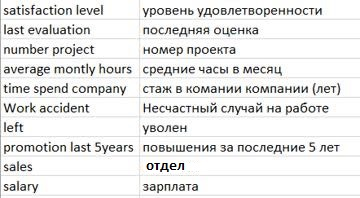

In [4]:
Image("description.jpg")

In [5]:
headers = {x.lower():x.lower()  for x in dataset.columns.values.tolist()}

headers['last_evaluation'] = 'last_feedback_mark'
headers['number_project'] = 'project_number'
headers['average_montly_hours'] = 'avg_monthly_hours'
headers['time_spend_company'] = 'years_at_company'
headers['Work_accident'] = 'work_accident'
headers['left'] = 'is_left'
headers['sales'] = 'department'
headers['salary'] = 'salary_level'

dataset = dataset.rename(columns = headers)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_feedback_mark       14999 non-null float64
project_number           14999 non-null int64
avg_monthly_hours        14999 non-null int64
years_at_company         14999 non-null int64
work_accident            14999 non-null int64
is_left                  14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary_level             14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**Пропусков нет**

In [7]:
dataset.head()

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,is_left,promotion_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


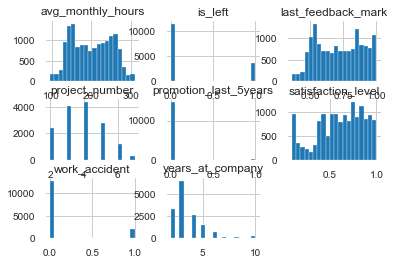

In [8]:
dataset.hist(bins=20)
plt.show()

In [9]:
dataset.duplicated().sum()

3008

В нашем датасете отсутствуют id сотрудников, так что
у нас вполне могут быть одинаковые записи с сотрудниками, задействованными на одном проекте, работающие в одном отделе с одинаковой годовой оценкой и т.д. (коллеги).

Пример такой выборки:

In [10]:
dataset[(dataset.duplicated()==True)
        &(dataset['satisfaction_level']==0.46)
        & (dataset['project_number']==2)
        & (dataset['last_feedback_mark'] > 0.50)
        & (dataset['department']=='sales')
        & (dataset['avg_monthly_hours']==139)
       ]

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,is_left,promotion_last_5years,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
12023,0.46,0.57,2,139,3,0,1,0,sales,low
12396,0.46,0.57,2,139,3,0,1,0,sales,low
14234,0.46,0.57,2,139,3,0,1,0,sales,low
14607,0.46,0.57,2,139,3,0,1,0,sales,low


**Дубликаты не удаляем.**

## Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [11]:
dataset.describe().round(3)

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,is_left,promotion_last_5years
count,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000,14999.000
mean,0.613,0.716,3.803,201.050,3.498,0.145,0.238,0.021
std,0.249,0.171,1.233,49.943,1.460,0.352,0.426,0.144
min,0.090,0.360,2.000,96.000,2.000,0.000,0.000,0.000
25%,0.440,0.560,3.000,156.000,3.000,0.000,0.000,0.000
50%,0.640,0.720,4.000,200.000,3.000,0.000,0.000,0.000
75%,0.820,0.870,5.000,245.000,4.000,0.000,0.000,0.000
max,1.000,1.000,7.000,310.000,10.000,1.000,1.000,1.000


In [12]:
dataset.median()

satisfaction_level         0.64
last_feedback_mark         0.72
project_number             4.00
avg_monthly_hours        200.00
years_at_company           3.00
work_accident              0.00
is_left                    0.00
promotion_last_5years      0.00
dtype: float64

In [13]:
dataset.select_dtypes(include='object').mode()

,department,salary_level
0,sales,low


In [14]:
dataset.mode()

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,is_left,promotion_last_5years,department,salary_level
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## Рассчитать и визуализировать корреляционную матрицу для переменных

In [15]:
corr_matrix = dataset.corr()
corr_matrix

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,is_left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_feedback_mark,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
project_number,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
avg_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
years_at_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
is_left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


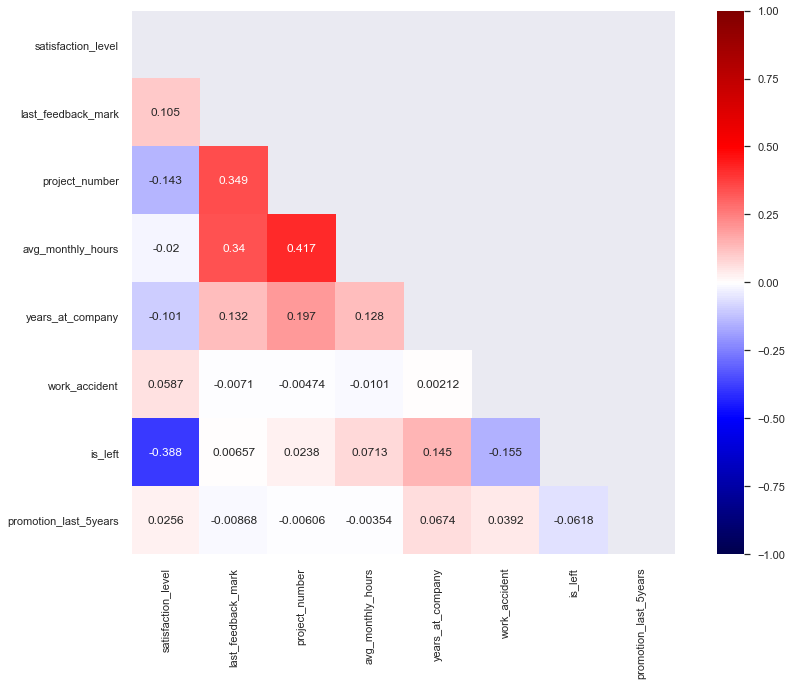

In [16]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(corr_matrix, annot=True, mask=np.triu(corr_matrix), fmt='.3g', square=True, cmap= 'seismic', vmin=-1, vmax=1, center= 0)
plt.show()

## Визуализировать несколько взаимосвязей между переменными

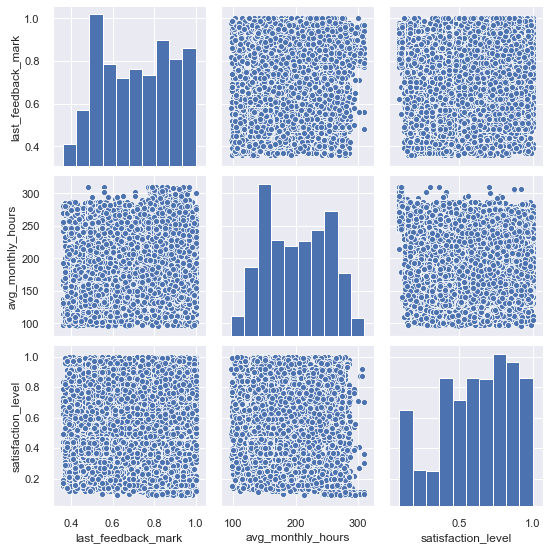

In [17]:
sns.pairplot(dataset,vars=['last_feedback_mark', 'avg_monthly_hours', 'satisfaction_level'], kind="scatter")
plt.show()

Между количественными переменными линейная зависимость отсутсвует.

## С использованием t-test статистики проверить взаимосвязи между несколькими переменными

### Сотрудники IT так же удовлетворены работой в компании как и сотрудники HR отдела

In [18]:
stats.shapiro(dataset['satisfaction_level'])

c:\users\xe\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9518948793411255, 0.0)

In [19]:
it = dataset[ dataset['department'] == 'IT']['satisfaction_level']
hr = dataset[ dataset['department'] == 'hr']['satisfaction_level']

In [20]:
len(it), len(hr)

(1227, 739)

In [21]:
it = it.sample(100)
hr = hr.sample(100)

In [22]:
statistics.variance(it), statistics.variance(hr)

(0.06466079797979798, 0.05975208080808081)

In [23]:
stats.ttest_ind(it, hr, equal_var=False)

Ttest_indResult(statistic=0.9100648962521691, pvalue=0.3638965213024522)

### Руководители столько же часов сколько и подчиненные.

In [24]:
stats.shapiro(dataset['avg_monthly_hours'])

(0.963361382484436, 0.0)

In [25]:
for pn in dataset['project_number'].unique():
    
    manager = dataset[(dataset['department'] == 'management') & (dataset['project_number'] == pn)]['avg_monthly_hours']
    subordinate = dataset[(dataset['department'] != 'management') & (dataset['project_number'] == pn)]['avg_monthly_hours']
    
    smpl = min([len(manager), len(subordinate)])
    manager = manager.sample(smpl)
    subordinate = subordinate.sample(smpl)
    
    print(f'project {pn}')
    print(f'manager variance: {statistics.variance(manager):.3f}\nsubordinate variance: {statistics.variance(subordinate):.3f}')
    t, p = stats.ttest_ind(manager, subordinate, equal_var=False)
    print(f't {t:.2f}, p-value {p:.3f}\n')
    


project 2
manager variance: 2298.471
subordinate variance: 1821.486
t 1.10, p-value 0.271

project 5
manager variance: 2144.109
subordinate variance: 1527.336
t -2.54, p-value 0.012

project 7
manager variance: 1610.744
subordinate variance: 2077.244
t -0.30, p-value 0.769

project 6
manager variance: 3314.548
subordinate variance: 3260.146
t -1.58, p-value 0.117

project 4
manager variance: 1913.892
subordinate variance: 2076.715
t -0.55, p-value 0.580

project 3
manager variance: 1723.395
subordinate variance: 1901.822
t 0.89, p-value 0.373



### У сотрудников получавших повышение оценка такая же как у не получавших.

In [26]:
stats.shapiro(dataset['last_feedback_mark'])

(0.9522111415863037, 0.0)

In [27]:
promoted = dataset[(dataset['promotion_last_5years'] == 1)]['last_feedback_mark']
not_promoted = dataset[(dataset['promotion_last_5years'] == 0)]['last_feedback_mark']
    
smpl = min([len(promoted), len(not_promoted)])
promoted = promoted.sample(smpl)
not_promoted = not_promoted.sample(smpl)   

In [28]:
print(f'promoted variance: {statistics.variance(promoted):.3f}\nnot_promoted variance: {statistics.variance(not_promoted):.3f}')
t, p = stats.ttest_ind(promoted, not_promoted, equal_var=False)
print(f't {t:.2f} p-value {p:.3f}\n')

promoted variance: 0.029
not_promoted variance: 0.032
t -0.95 p-value 0.340



## Рассчитать сколько работников работает в каждом департаменте

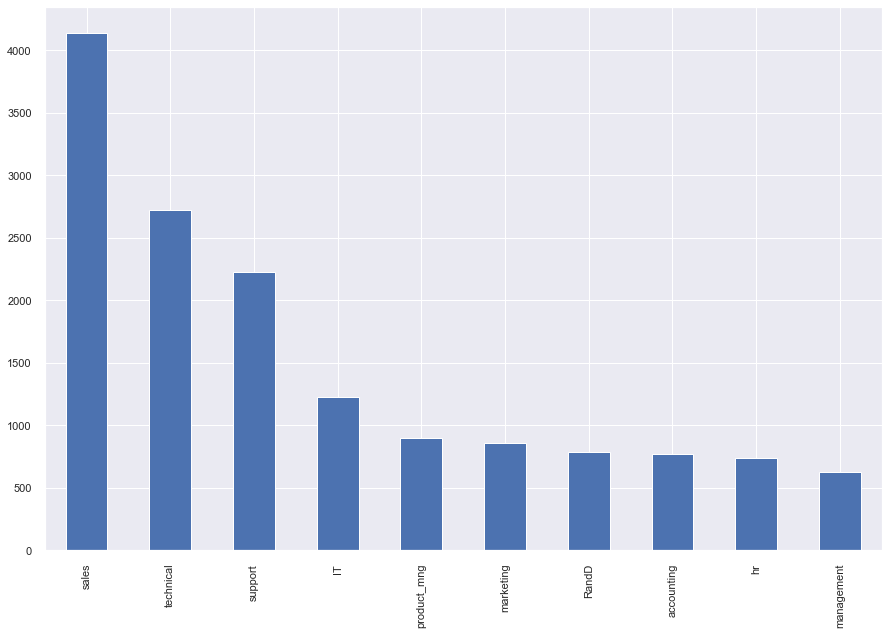

,index,department_count,department_perc
0,sales,4140,0.2760
1,technical,2720,0.1813
2,support,2229,0.1486
3,IT,1227,0.0818
4,product_mng,902,0.0601
5,marketing,858,0.0572
6,RandD,787,0.0525
7,accounting,767,0.0511
8,hr,739,0.0493
9,management,630,0.0420


In [29]:
dataset.department.value_counts().plot(kind='bar')
plt.show()

pd.merge(
        dataset.department.value_counts().to_frame().reset_index(),
        dataset.department.value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )

## Показать распределение сотрудников по зарплатам

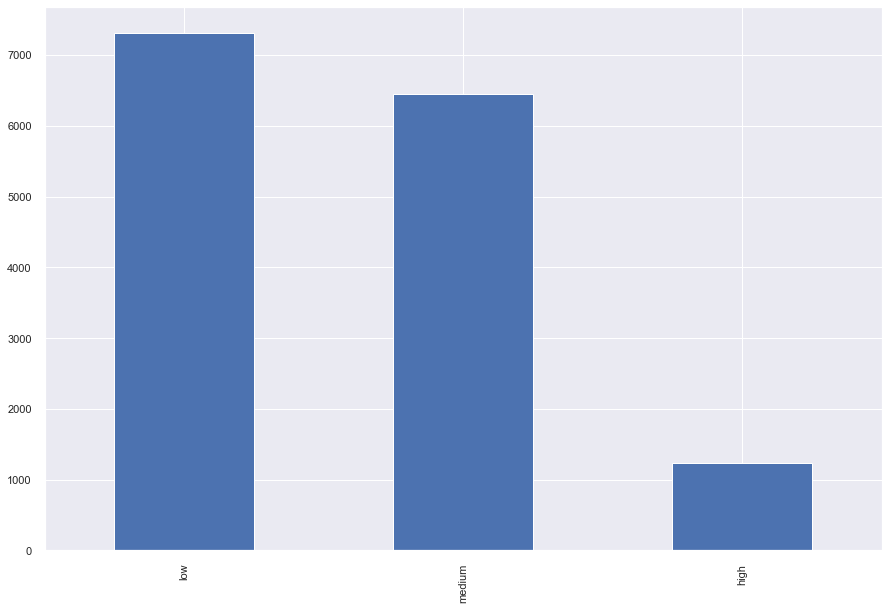

,index,salary_level_count,salary_level_perc
0,low,7316,0.4878
1,medium,6446,0.4298
2,high,1237,0.0825


In [30]:
dataset['salary_level'].value_counts().plot(kind='bar')
plt.show()

pd.merge(
        dataset['salary_level'].value_counts().to_frame().reset_index(),
        dataset['salary_level'].value_counts(normalize=True).round(4).to_frame().reset_index(),
        how='left', on='index', suffixes=['_count', '_perc']
        )

## Показать распределение сотрудников по зарплатам совместно с департаментами

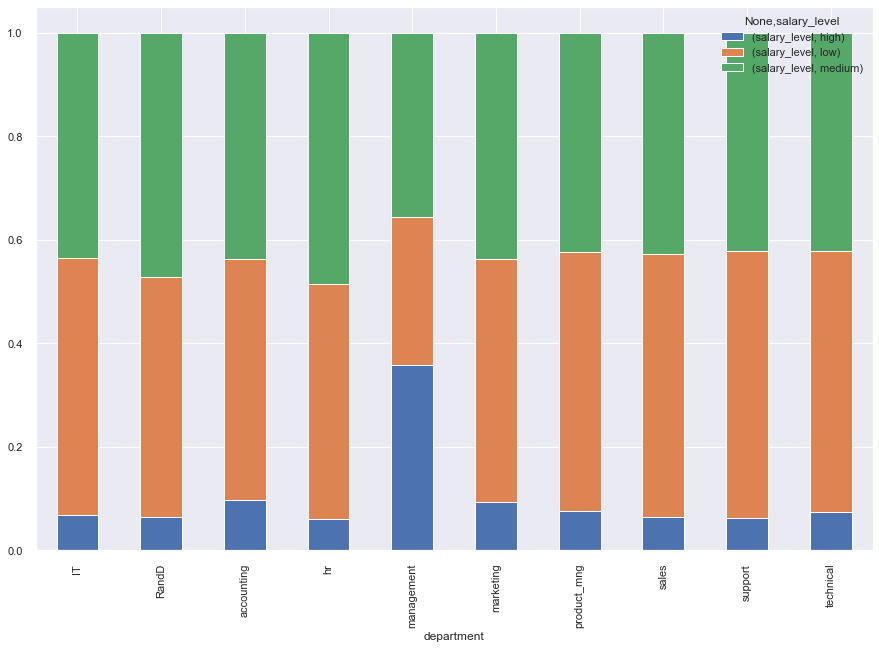

salary_level             
salary_level         high   low medium
department                            
IT                    6.8  49.6   43.6
RandD                 6.5  46.3   47.3
accounting            9.6  46.7   43.7
hr                    6.1  45.3   48.6
management           35.7  28.6   35.7
marketing             9.3  46.9   43.8
product_mng           7.5  50.0   42.5
sales                 6.5  50.7   42.8
support               6.3  51.4   42.3
technical             7.4  50.4   42.2

In [31]:
dataset.groupby(['department'])['salary_level'].value_counts(normalize=True).to_frame().unstack().plot(kind='bar', stacked=True)
plt.show()

dataset.groupby(['department'])['salary_level'].value_counts(normalize=True).to_frame().unstack().round(3)*100

Здесь мы можем увидеть, что распределение зарплат внутри отделов примерно одинаковое за исключением управленческого департамента, в котором доля зарплат высокго уровня значительно выше, чем в остальных департаментах _(зарплаты уровней низкий и средний соответственно ниже)_.

Посмотрим на распределение зарплат по департаментам без отдела менеджмента.

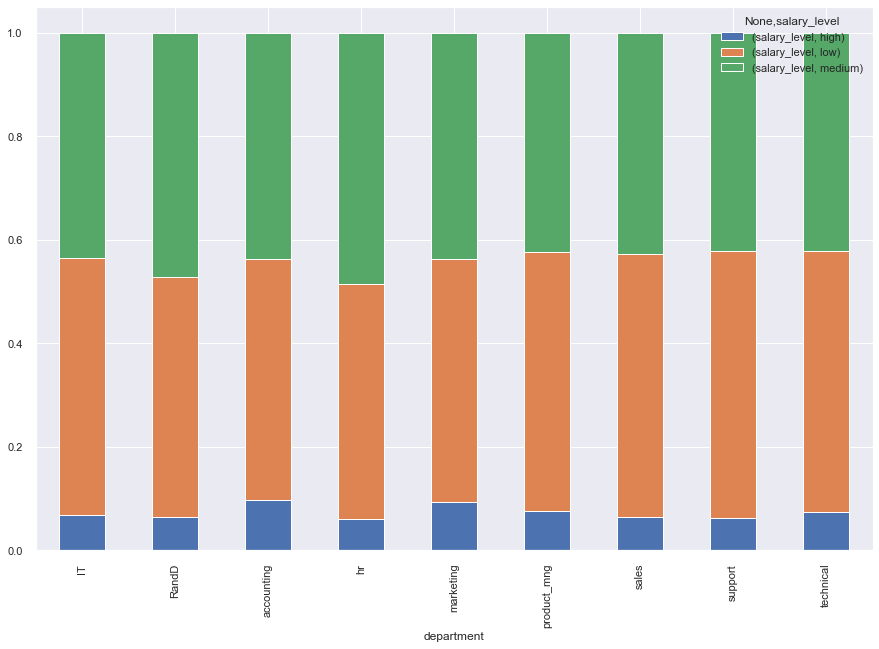

In [32]:
(
dataset
     .query('department != "management"')
     .groupby(['department'])['salary_level']
     .value_counts(normalize=True)
     .to_frame().unstack()
).plot(kind='bar', stacked=True)

plt.show()

Из столбчатой диаграммы не очень понятно присутствуют ли еще какие-либо различия в распределении зарплат

Постороим боксплот

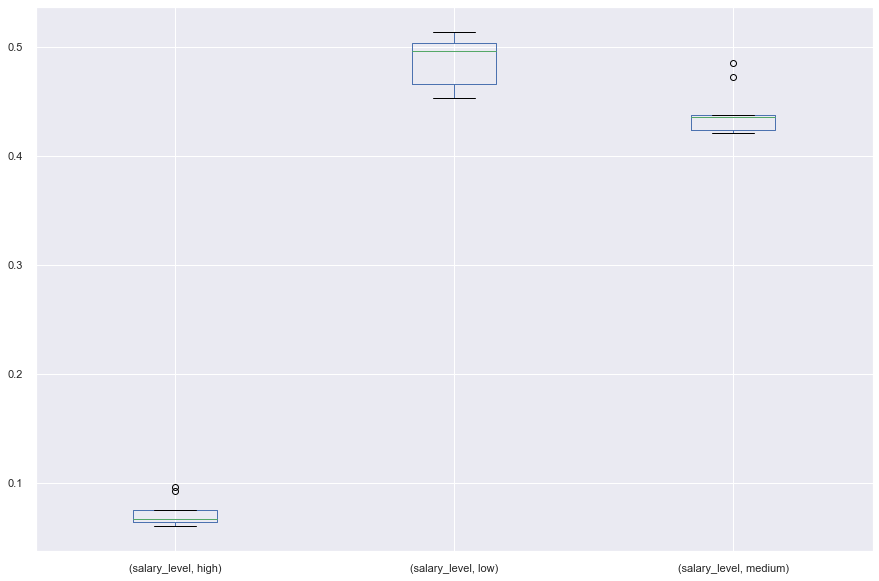

In [33]:
(
dataset
    .query('department != "management"')
    .groupby(['department'])['salary_level']
    .value_counts(normalize=True)
    .to_frame().unstack()
).boxplot()

plt.show()

Выбросы есть, но не ясно в каких департаментах

In [34]:
medium_ = (dataset
    .query('department != "management"')
    .groupby(['department'])['salary_level']
    .value_counts(normalize=True)
    .unstack().sort_values(by='medium')
).tail(2).index

high_ = (dataset
    .query('department != "management"')
    .groupby(['department'])['salary_level']
    .value_counts(normalize=True)
    .unstack().sort_values(by='high')
).tail(2).index

print(f'medium level: {", ".join(medium_.to_list())}\nhigh level: {", ".join(high_.to_list())}')

medium level: RandD, hr
high level: marketing, accounting


Итак:
 - В отделе менеджмента в целом уровень зарплат выше, чем в других отделах
 - Средний уровень зарплат чаще встречается в отделе кадров и отделе НИОКР
 - Высокий уровень зарплат чаще встречается в отделах маркетинга и  бухгалтерии

## Сколько сотрудников покинули компанию

In [35]:
dataset['is_left'].sum()

3571

За все время из компании уволился 3571 человек

## Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

### Определение текучести кадров 

Минутка гуглежа

In [36]:
link = 'https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D0%BA%D1%83%D1%87%D0%B5%D1%81%D1%82%D1%8C_%D0%BA%D0%B0%D0%B4%D1%80%D0%BE%D0%B2'
width, height = 950, 300
IFrame(link, width = width, height = height)

**Из статьи мы узнали:**
 - текучесть 3-5% в год это хорошо
 - высокая текучесть это плохо
 - экстремально низкая тоже плохо

Но процент сменяемости в реальности может отличатся от "теоретического" и может варироваться в зависимости от страны/отрасли/года/компании и т.д.

#### Пример:

In [37]:
link = 'https://antalrussia.ru/upload/medialibrary/cf5/tekuchest-personala-2018-industrii.png'
width, height = 871, 449
IFrame(link, width = width, height = height)

In [38]:
link = 'https://static.probusiness.by/n/07/0/zanyatost_1.jpg'
width, height = 747, 684
IFrame(link, width = width, height = height)

#### Факторы

Из статьи нам стали известны 
**факторы, влияющие на текучесть кадров:**
- Материальные (неконкурентоспособные ставки оплаты, несправедливая структура оплаты, нестабильные заработки);
- Организационные (график, режим, условия работы не соответствующие ожиданиям сотрудника, отсутствие возможности карьерного роста, повышения квалификации);
- Межличностные (взаимоотношения с руководством и коллегами).
- Возраст сотрудника (наиболее рискованный возраст перехода на другую работу до 25 лет);
- Квалификация сотрудника (чем ниже квалификация, тем чаще меняют работу);
- Место жительства сотрудника (чем дальше сотрудник живет от работы, тем больше риск его ухода);
- Стаж работы на предприятии (после трех лет стажа происходит резкое снижение текучести, что объясняется как фактором возраста, так и проблемами адаптации).

На основе этих факторов можно выдвинуть некоторые гипотезы.

### Гипотезы

На принятие решения влияют:
 * уровень удовлетворенности
 * уровень оплаты труда
 * наличие повышения
 * наличие/количество переработок
 * стаж работы в компании (`после трех лет стажа происходит снижение текучести`)

### Ушедшие сотрудники

Посмотрим на наш датасет еще раз, под дргуими углами.

Выделим в отдельный датафрейм данные о ушедших сотрудниках.
Посчитаем процент уволившихся, а так же их распределение по отделам и уровню зарплаты.

In [39]:
employees_lefted = dataset[ dataset['is_left']==1 ]

Общий уровень текучки для компании:

In [40]:
print(f'percent of left employees: {employees_lefted.shape[0]/dataset.shape[0]:.2%}')

percent of left employees: 23.81%


**23,81%** всех когда-либо работавших в компании сотрудников уволились.

Период за который произошли увольнения (месяц/год/все время) неизвестен.


В каком отделе этот показатель выше/ниже?

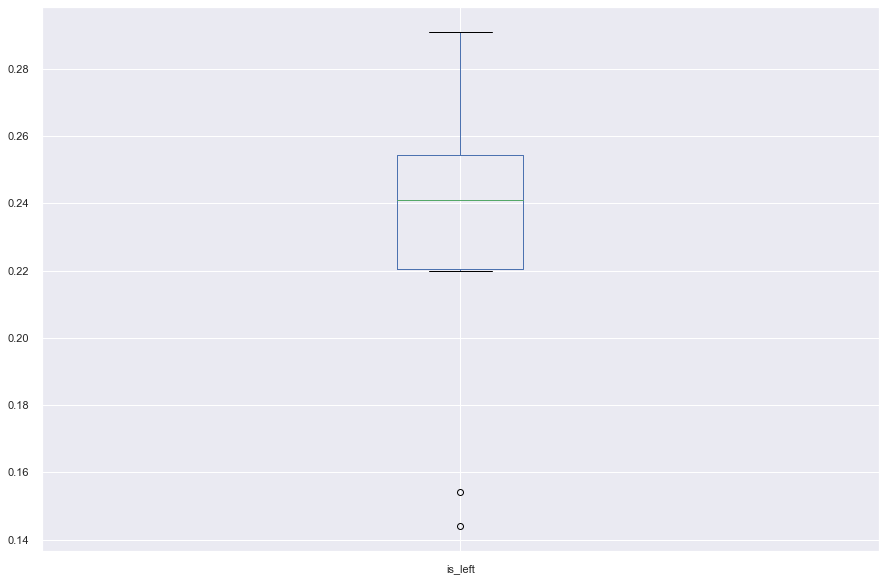

,is_left
department,
hr,0.291
accounting,0.266
technical,0.256
support,0.249
sales,0.245
marketing,0.237
IT,0.222
product_mng,0.220
RandD,0.154


In [41]:
dataset.groupby('department')[['is_left']].mean().round(3).sort_values(by='is_left', ascending=False).boxplot()
plt.show()

dataset.groupby('department')[['is_left']].mean().round(3).sort_values(by='is_left', ascending=False)

Сотрудники отделов НИОКР и менеджмента уволились в меньшем количестве от первоначального.

Добавим к списку гипотез: _"род деятельности"_

С каким уровнем зарплаты уволилось больше?

In [42]:
(employees_lefted.groupby('salary_level')['is_left'].count()
 /dataset.groupby('salary_level')['is_left'].count()
).round(3).sort_values(ascending = False).to_frame()

,is_left
salary_level,
low,0.297
medium,0.204
high,0.066


Ожидаемо с низким уровнем и чуть меньше с средним

In [43]:
dataset.groupby('is_left').mean()

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,promotion_last_5years
is_left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [44]:
dataset.groupby('is_left').median()

,satisfaction_level,last_feedback_mark,project_number,avg_monthly_hours,years_at_company,work_accident,promotion_last_5years
is_left,,,,,,,
0,0.69,0.71,4,198,3,0,0
1,0.41,0.79,4,224,4,0,0


из этой таблицы видим, что у уволившихся:
- уровень удовлетворенности ниже
- отработанных часов больше
- в среднем работали в компании дольше (обратно нашей гипотезе)

Посмотрим на уволившихся в разрезе проектов

In [45]:
(
employees_lefted.groupby(['project_number'])['is_left'].count()
/dataset.groupby(['project_number'])['is_left'].count()
).round(4).sort_values().to_frame().transpose()

project_number,3,4,5,6,2,7
is_left,0.0178,0.0937,0.2217,0.5579,0.6562,1.0


Все сотрудники работавшие на проекте7 больше не числятся в компании!

Скорее это связано непосредственно с самим проектом (закрытие/продажа/банкротство), а не с устроенным бунтом на корабле.

В дальнейшем исследовании эти данные будем игнорировать.

In [46]:
df = dataset[ dataset['project_number'] != 7 ]

### Проверка гипотез

#### Подготовка данных

Обновленный список гипотез

На принятие решения в пользу увольнения влияют:
 * уровень удовлетворенности
 * уровень оплаты труда
 * наличие повышения
 * наличие/количество переработок
 * стаж работы в компании
 * _род деятельности_

Решение об увольнении сотрудника, как правило, складывается из нескольких факторов и каждый из их может влиять в той или иной степени.

У нас остались не нормированные данные

In [47]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

In [48]:
df[['avg_monthly_hours', 'years_at_company']] = min_max_scaler.fit_transform(df[['avg_monthly_hours', 'years_at_company']])

c:\users\xe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\xe\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Также нам необходимо представить данные о каждом сотруднике в виде вектора, чтобы можно было их сравнивать между собой.

In [49]:
i = 0
for grade in df['salary_level'].unique():
    grade_binary = grade + '_' + 'salary_level'
    df[grade_binary] = df['salary_level'].isin([df['salary_level'].unique()[i]])*1
    i += 1

c:\users\xe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
i = 0
for grade in df['department'].unique():
    grade_binary = grade + '_' + 'department'
    df[grade_binary] = df['department'].isin([df['department'].unique()[i]])*1
    i += 1

c:\users\xe\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [51]:
df = df.drop(['department', 'salary_level', 'project_number'], axis=1)

In [52]:
df.head()

,satisfaction_level,last_feedback_mark,avg_monthly_hours,years_at_company,work_accident,is_left,promotion_last_5years,low_salary_level,medium_salary_level,high_salary_level,sales_department,accounting_department,hr_department,technical_department,support_department,management_department,IT_department,product_mng_department,marketing_department,RandD_department
0,0.38,0.53,0.285047,0.125,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0.80,0.86,0.775701,0.500,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,0.72,0.87,0.593458,0.375,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,0.37,0.52,0.294393,0.125,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5,0.41,0.50,0.266355,0.125,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
df.shape

(14743, 20)

#### Random Forest

In [54]:
X = df.loc[:, df.columns != 'is_left']
y = df['is_left']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_importance = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

print(f'model accuracy: {model.score(X_test, y_test):.3%}')

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3426
           1       0.99      0.97      0.98       997

    accuracy                           0.99      4423
   macro avg       0.99      0.98      0.99      4423
weighted avg       0.99      0.99      0.99      4423

model accuracy: 99.186%


**Модель показала точность 99%**

### Выводы

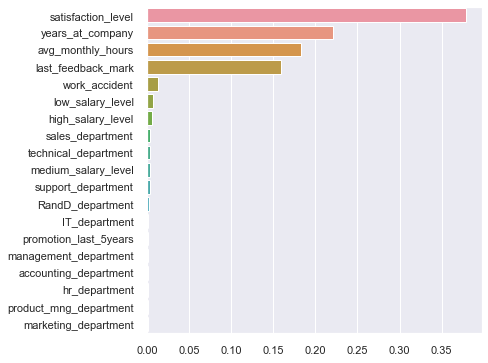

,index,0
0,satisfaction_level,0.3785
1,years_at_company,0.2214
2,avg_monthly_hours,0.1836
3,last_feedback_mark,0.1589
4,work_accident,0.0128
5,low_salary_level,0.0077
6,high_salary_level,0.0060
7,sales_department,0.0043
8,technical_department,0.0042
9,medium_salary_level,0.0040


In [57]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.show()

feature_importance.to_frame().round(4).reset_index().head(10)

In [58]:
df.groupby('is_left').median().iloc[:,:7]

,satisfaction_level,last_feedback_mark,avg_monthly_hours,years_at_company,work_accident,promotion_last_5years,low_salary_level
is_left,,,,,,,
0,0.69,0.71,0.476636,0.125,0,0,0
1,0.42,0.71,0.514019,0.250,0,0,1


Вернемся к гипотезам.

**На принятие решения в сильной степени влияют:**

* уровень удовлетворенности

у уволившихся сотрудников уровень удовлетворенности ниже, чем у тех кто остался

* стаж работы в компании

вопреки информации из Википедии, наши наблюдения говорят, что после трех лет работы люди склонны менять место

In [59]:
df.groupby('is_left').median()['avg_monthly_hours'][1]/df.groupby('is_left').median()['avg_monthly_hours'][0]-1

0.07843137254901955

* наличие/количество переработок

медианное значение среднемесячной выработки часов у уволившихся сотрудников выше на **7.84%**

 * последняя оценка сотрудника *(не было среди наших гипотез)*
 
модель показывает, что оценка сотрудника влияет, несмотря на то, что медианные значения совпадают о обеих групп

**На принятие решения незначительно влияют:**

 * происшествия/несчастные случаи *(не было среди наших гипотез)*

Что касается остальных гипотез:
* уровень оплаты труда

почти не влияет 

 * наличие повышения

совсем не влияет

 * род деятельности
 
очень слабо влияет (для отдела продаж и технического отдела)

несмотря, что отдел подбора персонала был рекордсменом по количеству ушедших сотрудников